## Anomaly Detection using IsolationForest

- In data analysis, anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behaviour.[1] Such examples may arouse suspicions of being generated by a different mechanism,[2] or appear inconsistent with the remainder of that set of data.[3] <br>(wikipedia.org)


In [1]:
# importing required libraies
import pandas as pd
import matplotlib.pyplot as plt
import glob
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# extracting files names
txtfiles = []
for file in glob.glob("*.txt"):
    txtfiles.append(file)
txtfiles

['data0 (1).txt',
 'data109.txt',
 'data112.txt',
 'data88.txt',
 'data89.txt',
 'requirements.txt']

#### importing, organizing, cleaning and merging data

In [3]:
all_data = []
for file in txtfiles:
    with open(file, 'r') as f:
        lines = f.readlines() # reading data
        lines = [line.replace(' ', '') for line in lines] # removing spaces
        lines = lines[0].split(',') # splitting each data point
        df = pd.DataFrame(lines) # converting to data frame
        df.drop(df.shape[0]-1,inplace=True) # dropping last values which is  " "
        df[0] = df[0].astype('int') # converting datapoint to int
        all_data.append(df) # appending dataframe to list
main_df = pd.concat(all_data) # merging all dataframes 
main_df.columns = ['values'] # renamimg column name
main_df.reset_index(inplace = True, drop=True) # resetting index
print('shape :',main_df.shape,'\n') # shape of data frame
print('value counts : \n\n', main_df['values'].value_counts(),'\n') # checking for value counts
print('value counts percentage : \n\n',main_df['values'].value_counts(normalize=True)*100) # checking for value counts ratio

shape : (50000, 1) 

value counts : 

 0      42229
128     2876
120     2874
248     2021
Name: values, dtype: int64 

value counts percentage : 

 0      84.458
128     5.752
120     5.748
248     4.042
Name: values, dtype: float64


In [4]:
main_df

,values
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,120
49998,0


#### Using Isolation forest for Anomaly detection

In [5]:
from sklearn.ensemble import IsolationForest # importing model
outlier_fraction = 0.1 # assuming 10% outliers in the data
model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(outlier_fraction),max_features = 1.0) # model initiation
model.fit(main_df[['values']]) # fitting data
main_df['anomaly'] = model.predict(main_df[['values']]) # predicting on data and appending to main data df

In [6]:
main_df

,values,anomaly
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
49995,0,1
49996,0,1
49997,120,1
49998,0,1


In [7]:
print('Anomaly and their count \n')
main_df[main_df['anomaly']==-1][['values']].value_counts()

Anomaly and their count 



values
128       2876
248       2021
dtype: int64

#### Visualising Anomalies

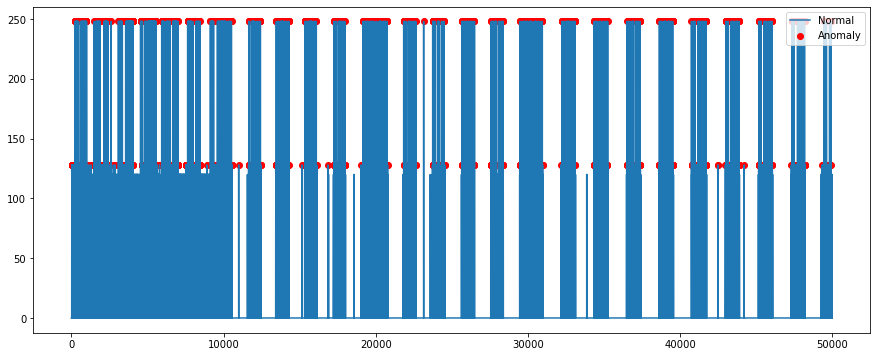

In [8]:
# visualization
fig, ax = plt.subplots(figsize=(15,6))
a = main_df[main_df['anomaly']==-1][['values']] #anomaly
ax.plot(main_df.index, main_df['values'], label = 'Normal')
ax.scatter(a.index,a['values'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

#### Observation
- we can clearly see, values equal to 248 and 128 are considered as Anomaly.
- we can use trained isolation forest model for future prediction 
- or else use condition if data point is >= 128 considered as Anomaly

#### Realtime Testing using Isolation forest Model

In [9]:
test = int(input('Enter value:'))
result = model.predict([[test]])
if result[0] == 1:
    print('\nResult : Normal')
else:
    print('\nResult : Not Normal (Anomaly)')

Enter value:125

Result : Normal
